# Text Generation with LLMs

## 1. Two Phase of inference process

The process can be broken down into two main phases: prefill and decode. These phases work together like an assembly line, each playing a crucial role in producing coherent text.

### 1.1. The prefill phase

The prefill phase is like the preparation stage in cooking - it’s where all the initial ingredients are processed and made ready. This phase involves three key steps:



1. **Tokenization**: Converting the input text into tokens (think of these as the basic building blocks the model understands)

2. **Embedding Conversion**: Transforming these tokens into numerical representations that capture their meaning

3. **Initial Processing**: Running these embeddings through the model’s neural networks to create a rich understanding of the context

This phase is computationally intensive because it needs to process all input tokens at once. Think of it as reading and understanding an entire paragraph before starting to write a response.



### 1.2. The decode phase

After the prefill phase has processed the input, we move to the decode phase - this is where the actual text generation happens. The model generates one token at a time in what we call an autoregressive process (where each new token depends on all previous tokens).



The decode phase involves several key steps that happen for each new token:



1. **Attention Computation**: Looking back at all previous tokens to understand context

2. **Probability Calculation**: Determining the likelihood of each possible next token

3. **Token Selection**: Choosing the next token based on these probabilities

4. **Continuation Check**: Deciding whether to continue or stop generation

## 2. Sampling strategies

Now that we understand how the model generates text, let’s explore the various ways we can control this generation process. Just like a writer might choose between being more creative or more precise, we can adjust how the model makes its token selections.



### 2.1. Understanding Token Selection: From Probabilities to Token Choices


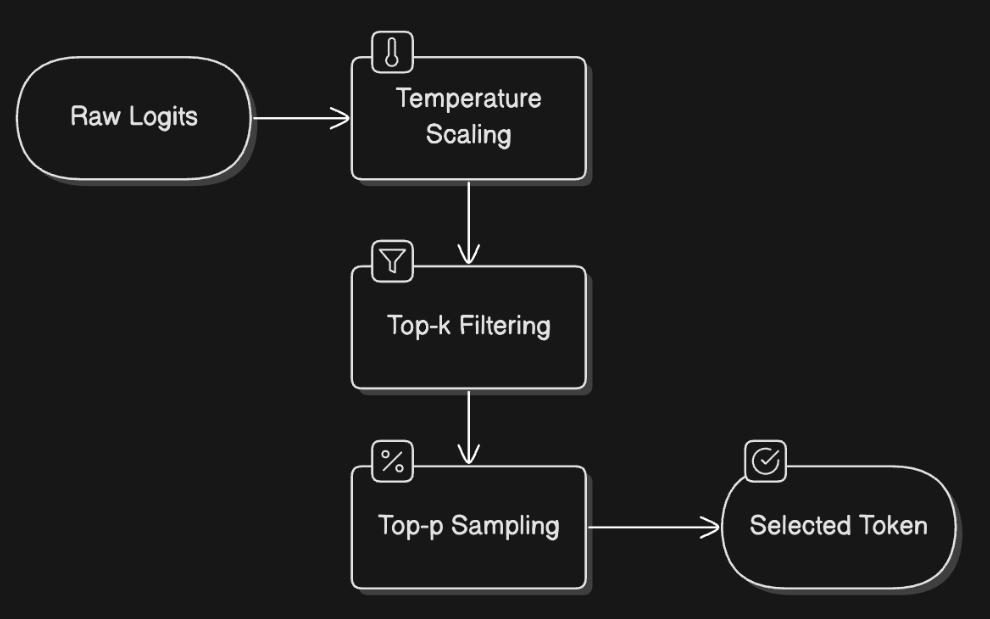

1. **Raw Logits**: Think of these as the model’s initial gut feelings about each possible next word

2. **Temperature Control**: Like a creativity dial - higher settings (>1.0) make choices more random and creative, lower settings (<1.0) make them more focused and deterministic

3. **Top-p (Nucleus) Sampling**: Instead of considering all possible words, we only look at the most likely ones that add up to our chosen probability threshold (e.g., top 90%)

4. **Top-k Filtering**: An alternative approach where we only consider the k most likely next words

### 2.2. Managing Repetition: Keeping Output Fresh


One common challenge with LLMs is their tendency to repeat themselves - much like a speaker who keeps returning to the same points. To address this, we use two types of penalties:



1. **Presence Penalty**: A fixed penalty applied to any token that has appeared before, regardless of how often. This helps prevent the model from reusing the same words.

2. **Frequency Penalty**: A scaling penalty that increases based on how often a token has been used. The more a word appears, the less likely it is to be chosen again.

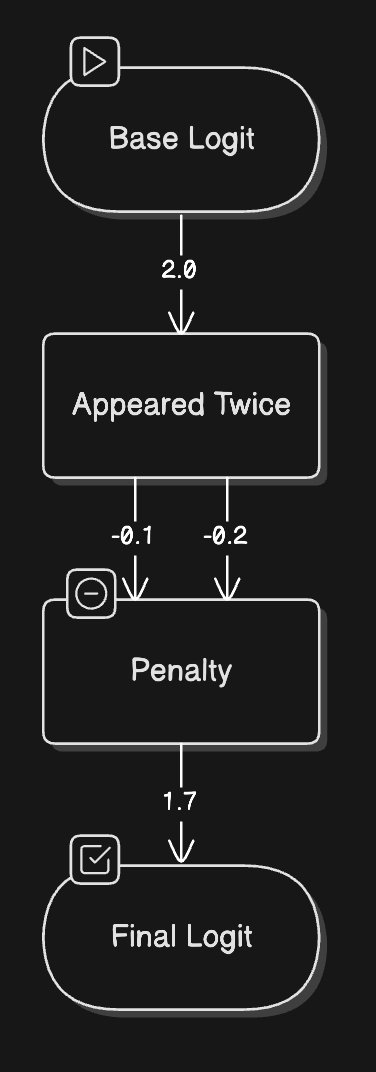

These penalties are applied early in the token selection process, adjusting the raw probabilities before other sampling strategies are applied. Think of them as gentle nudges encouraging the model to explore new vocabulary.



### 2.3. Controlling Generation Length: Setting Boundaries


Just as a good story needs proper pacing and length, we need ways to control how much text our LLM generates. This is crucial for practical applications - whether we’re generating a tweet-length response or a full blog post.



We can control generation length in several ways:



1. **Token Limits**: Setting minimum and maximum token counts

2. **Stop Sequences**: Defining specific patterns that signal the end of generation

3. **End-of-Sequence Detection**: Letting the model naturally conclude its response

### 2.4. Beam Search

While the strategies we’ve discussed so far make decisions one token at a time, beam search takes a more holistic approach. Instead of committing to a single choice at each step, it explores multiple possible paths simultaneously - like a chess player thinking several moves ahead.



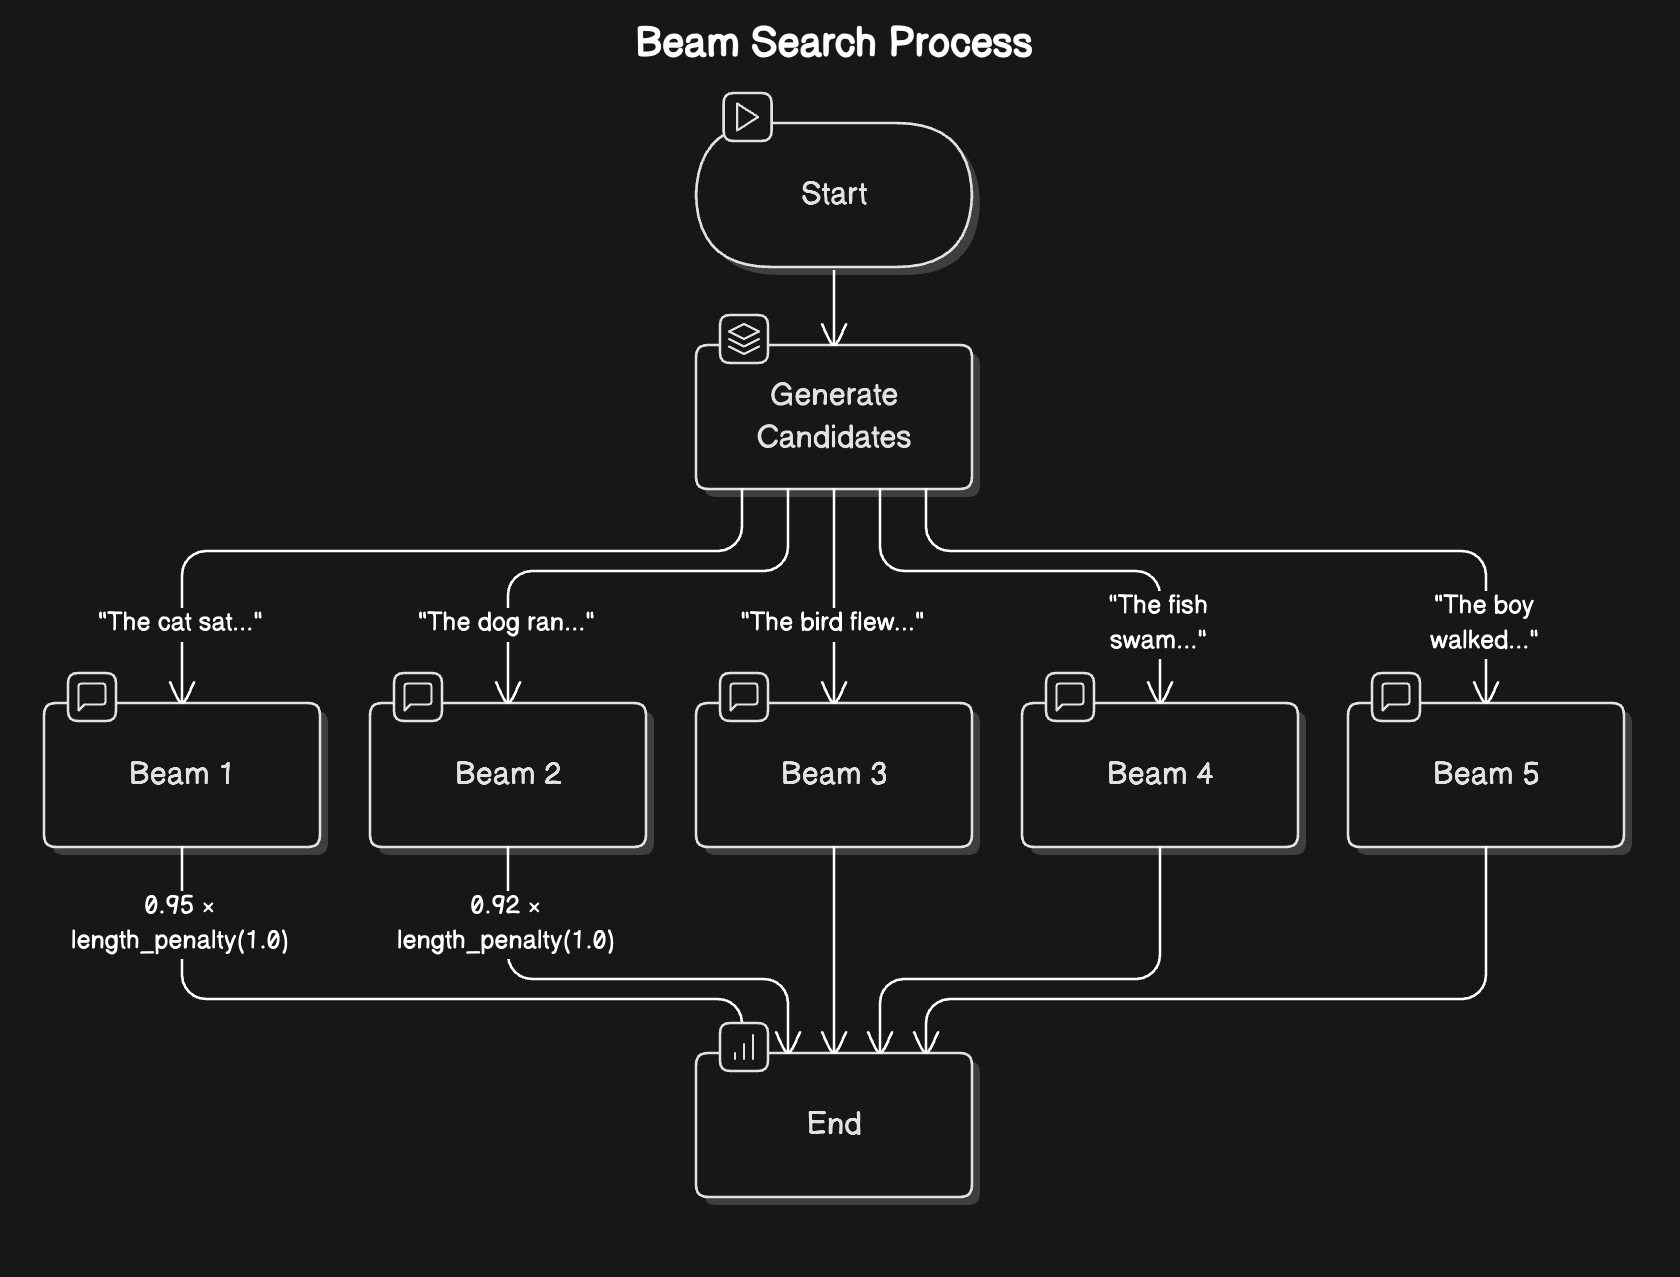

Here’s how it works:

1. At each step, maintain multiple candidate sequences (typically 5-10)

2. For each candidate, compute probabilities for the next token

3. Keep only the most promising combinations of sequences and next tokens

4. Continue this process until reaching the desired length or stop condition

5. Select the sequence with the highest overall probability

## 3. Practical Challenges

### 3.1. Key Performance Metrics


When working with LLMs, four critical metrics will shape your implementation decisions:



1. **Time to First Token (TTFT)**: How quickly can you get the first response? This is crucial for user experience and is primarily affected by the prefill phase.

2. **Time Per Output Token (TPOT)**: How fast can you generate subsequent tokens? This determines the overall generation speed.

3. **Throughput**: How many requests can you handle simultaneously? This affects scaling and cost efficiency.

4. **VRAM Usage**: How much GPU memory do you need? This often becomes the primary constraint in real-world applications.

### 3.2. The Context Length Challenge


One of the most significant challenges in LLM inference is managing context length effectively. Longer contexts provide more information but come with substantial costs:



1. **Memory Usage**: Grows quadratically with context length

2. **Processing Speed**: Decreases linearly with longer contexts

3. **Resource Allocation**: Requires careful balancing of VRAM usage